## ライブラリの読み込み

In [3]:
import pandas as pd
import numpy as np
import pymatgen as mg
from pymatgen.electronic_structure.plotter import BSPlotter, DosPlotter
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import tqdm
import pickle
import os

## Materials Projectの全データCSVの読み込み

In [4]:
mpalldata = pd.read_csv('hato_datasets_xy_CrySys.csv', index_col=0)

In [5]:
mpalldata = mpalldata.set_index("mpid")

In [6]:
#CrystalSystemを数字化する辞書作成
cslist = list(mpalldata["Crystal System"].unique())
csnum = list(range(len(cslist)))
csdict = dict(zip(cslist,csnum))
csdict

{'tetragonal': 0,
 'cubic': 1,
 'trigonal': 2,
 'monoclinic': 3,
 'hexagonal': 4,
 'orthorhombic': 5,
 'triclinic': 6}

In [7]:
f_str2num = lambda x: csdict[x]
mpalldata["cs_num"] = mpalldata["Crystal System"].apply(f_str2num)

In [8]:
mpalldata

,formula,e_hull,gap pbe,mu_b,elastic anisotropy,bulk modulus,shear modulus,structure,e_form,initial structure,sg_symbol,sg_num,xrd_x,xrd_y,Crystal System,cs_num
mpid,,,,,,,,,,,,,,,,
mp-85,In,0.003319,0.0000,2.700000e-05,1.044699,33.154748,4.904836,"{'@module': 'pymatgen.core.structure', '@class...",0.003319,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[32.330742843538374, 37.50502035236625, 54.083...","[100.0, 49.92938574826252, 33.52945689018866, ...",tetragonal,0
mp-639755,Rb,0.009017,0.0000,1.805000e-04,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.009017,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[21.532913615272474, 22.657887597027432, 30.63...","[56.532038666792126, 100.00000000000001, 23.21...",tetragonal,0
mp-569289,Hg,0.007526,0.0000,-2.500000e-06,1.224989,8.500236,2.913088,"{'@module': 'pymatgen.core.structure', '@class...",0.007526,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[30.54180118081431, 32.95023449689478, 43.7372...","[60.73225325510433, 100.0, 23.24527154480579, ...",tetragonal,0
mp-1056579,Si,0.484841,0.0000,1.000000e-07,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.484841,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[37.94561347276035, 44.350129330306515, 54.746...","[79.97048396992744, 100.0, 26.312492485741455,...",tetragonal,0
mp-974920,Na,0.002600,0.0000,-1.739000e-04,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.002600,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[29.249921926130114, 32.58071721314504, 34.545...","[100.0, 18.67886212541886, 31.724771737787158,...",tetragonal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mp-23857,CoCuH18N6Cl5,0.006144,0.4954,7.999830e+00,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",-0.773114,"{'@module': 'pymatgen.core.structure', '@class...",Fd-3c,228,"[11.220159259146211, 13.75287734427288, 15.893...","[0.7035032803368115, 1.4281277684686506, 100.0...",cubic,1
mp-24013,CrCuH18N6Cl5,0.003031,0.5223,3.200000e+01,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",-0.818846,"{'@module': 'pymatgen.core.structure', '@class...",Fd-3c,228,"[11.121960570702896, 13.632320618291791, 15.75...","[0.6059423693366579, 5.683694250566078, 100.0,...",cubic,1
mp-24198,CrHgH18N6Cl5,0.000000,2.6843,2.399999e+01,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",-0.831574,"{'@module': 'pymatgen.core.structure', '@class...",Fd-3c,228,"[10.852345977870781, 13.301345368779407, 15.37...","[0.2977481853767556, 44.78400780157401, 100.0,...",cubic,1


In [9]:
mpalldata.head(2)

,formula,e_hull,gap pbe,mu_b,elastic anisotropy,bulk modulus,shear modulus,structure,e_form,initial structure,sg_symbol,sg_num,xrd_x,xrd_y,Crystal System,cs_num
mpid,,,,,,,,,,,,,,,,
mp-85,In,0.003319,0.0,0.000027,1.044699,33.154748,4.904836,"{'@module': 'pymatgen.core.structure', '@class...",0.003319,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[32.330742843538374, 37.50502035236625, 54.083...","[100.0, 49.92938574826252, 33.52945689018866, ...",tetragonal,0
mp-639755,Rb,0.009017,0.0,0.000180,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.009017,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[21.532913615272474, 22.657887597027432, 30.63...","[56.532038666792126, 100.00000000000001, 23.21...",tetragonal,0


In [10]:
#X線回折パターンが無いものを削除
mpalldata = mpalldata[mpalldata["xrd_x"]!='[]']

In [11]:
mpalldata.shape

(63644, 16)

In [12]:
mpidlist = list(mpalldata.index)

## 入力ベクトルの生成（ここを色々変えて検証する）

In [13]:
xrdcalc = XRDCalculator()
inputlist = []
totalpeaks = []
numofpeak = 30
for index, row in mpalldata.iterrows():
    try:
        x = np.array(eval(row['xrd_x']))
        y = np.array(eval(row['xrd_y']))
        
        totalpeaks.append(len(x))
        inputlist.append(list(np.sort(x[np.argsort(y)[::-1][:numofpeak]])))
    except:
        inputlist.append([])

In [14]:
df_input = pd.DataFrame(inputlist)

In [15]:
inputsize = numofpeak

In [16]:
#情報の追加
#inputsizeは追加した分だけ数字を足す

#inputsize = numofpeak + 1
#df_input["totalpeaks"] =  totalpeaks

In [17]:
df_input = df_input.set_index(pd.Series(mpidlist))

In [18]:
df_input = df_input.fillna(0)

In [19]:
df_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
mp-85,32.330743,37.505020,54.083897,64.432445,67.672512,80.026075,88.958593,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mp-639755,21.532914,22.657888,30.636929,33.811565,38.442247,40.440583,43.877156,46.268013,49.380364,49.935543,...,74.185295,75.303695,78.303114,79.402851,80.455877,82.360428,84.681654,85.106493,87.460038,88.497484
mp-569289,30.541801,32.950234,43.737294,50.649999,55.829282,60.309503,63.574448,69.110105,72.164015,73.490286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mp-1056579,37.945613,44.350129,54.746884,73.006034,73.552539,81.119207,85.886595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mp-974920,29.249922,32.580717,34.545462,48.217082,49.657673,56.098695,58.677830,60.660293,68.251403,72.860089,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
df_concat = pd.concat([mpalldata,df_input],axis=1)

In [21]:
df_concat.shape

(63644, 46)

In [22]:
df_concat.head()

,formula,e_hull,gap pbe,mu_b,elastic anisotropy,bulk modulus,shear modulus,structure,e_form,initial structure,...,20,21,22,23,24,25,26,27,28,29
mp-85,In,0.003319,0.0,2.700000e-05,1.044699,33.154748,4.904836,"{'@module': 'pymatgen.core.structure', '@class...",0.003319,"{'@module': 'pymatgen.core.structure', '@class...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mp-639755,Rb,0.009017,0.0,1.805000e-04,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.009017,"{'@module': 'pymatgen.core.structure', '@class...",...,74.185295,75.303695,78.303114,79.402851,80.455877,82.360428,84.681654,85.106493,87.460038,88.497484
mp-569289,Hg,0.007526,0.0,-2.500000e-06,1.224989,8.500236,2.913088,"{'@module': 'pymatgen.core.structure', '@class...",0.007526,"{'@module': 'pymatgen.core.structure', '@class...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mp-1056579,Si,0.484841,0.0,1.000000e-07,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.484841,"{'@module': 'pymatgen.core.structure', '@class...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mp-974920,Na,0.002600,0.0,-1.739000e-04,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.002600,"{'@module': 'pymatgen.core.structure', '@class...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
df_concat['bulk modulus'].max()

7960.0

In [33]:
df_concat['bulk modulus'].min()

-21843.0

In [28]:
df_concat['bulk modulus'].idxmin()

'mp-2288'

In [31]:
df_concat.loc[df_concat['bulk modulus'].idxmin()]

formula                                                            PuSe
e_hull                                                              0.0
gap pbe                                                             0.0
mu_b                                                           5.776207
elastic anisotropy                                                -8.25
bulk modulus                                                   -21843.0
shear modulus                                                     734.0
structure             {'@module': 'pymatgen.core.structure', '@class...
e_form                                                        -1.525624
initial structure     {'@module': 'pymatgen.core.structure', '@class...
sg_symbol                                                         Fm-3m
sg_num                                                              225
xrd_x                 [26.237304580689013, 30.387094596182333, 43.50...
xrd_y                 [45.285325861460336, 100.0, 76.07090839167

In [35]:
df_concat['bulk modulus']>0

mp-85          True
mp-639755     False
mp-569289      True
mp-1056579    False
mp-974920     False
              ...  
mp-23857      False
mp-24013      False
mp-24198      False
mp-24429      False
mp-24430      False
Name: bulk modulus, Length: 63644, dtype: bool

In [41]:
df_new = df_concat[df_concat['bulk modulus']>0]

In [51]:
df_new.shape

(6861, 46)

## 学習、検証

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [88]:
#かなり時間がかかるかも
k=5
kfold = KFold(n_splits=k,shuffle=True,random_state=0)
targetlist=["bulk modulus"]#["sg_num"]#["cs_num"]#["bulk modulus"]#,"Electrical conductivity","Thermal conductivity","ZT"]
results = {}
for target in tqdm.tqdm(targetlist):
    #clear_output(wait = True)
    df_tmp = df_new.dropna(subset=[target]).copy()
    train_x_tmp = df_tmp.iloc[:,-1*inputsize:].copy() # 説明変数のみにする
    train_y_tmp = df_tmp[target].copy()
    r2list=[]
    rmselist = []
    maelist = []
    raelist = []
    rselist = []
    predlist = []
    truelist = []
    modellist = []
    Xtestlist = []
    ytestlist = []
    best_params = []
    for train_index, test_index in kfold.split(train_x_tmp):
        X_train, X_test = np.array(train_x_tmp)[train_index], np.array(train_x_tmp)[test_index]
        y_train, y_test = np.array(train_y_tmp)[train_index], np.array(train_y_tmp)[test_index]
        random_forest = RFR(n_estimators=100,criterion='mse',n_jobs=-1,max_features="sqrt",random_state=0)#(max_depth=10, n_estimators=10, random_state=0)#ほしい値は分類ではなく連続値なのでRFCではなくRFR
        #random_forest = RFC(n_estimators=100, n_jobs=-1,random_state=0)
        random_forest.fit(X_train, y_train)
        y_pred = random_forest.predict(X_test)
        predlist.append(y_pred)
        truelist.append(y_test)
        modellist.append(random_forest)
        r2list.append(r2_score(y_test, y_pred))
        rmselist.append(np.sqrt(np.sum((y_pred - y_test)**2)/len(y_pred)))
        maelist.append(mean_absolute_error(y_test,y_pred))
        raelist.append(np.sum(np.abs(y_pred - y_test))/np.sum(np.abs(y_test - np.mean(y_test))))
        rselist.append(np.sum((y_pred - y_test)**2)/np.sum((y_test - np.mean(y_test))**2))
        Xtestlist.append(X_test)
        ytestlist.append(y_test)
    selectindex = np.argmax(r2list) #argがついてるやつはindexを返してくれるやつ
    results.setdefault(target,{"Xtestlist":Xtestlist[selectindex],"ytestlist":ytestlist[selectindex],"model":modellist[selectindex],"selectindex":selectindex,"r2list":r2list,"raelist":raelist,"rmselist":rmselist,"maelist":maelist,"rselist":rselist})

100%|██████████| 1/1 [00:03<00:00,  3.68s/it]


## 回帰(RFR)の場合の精度評価

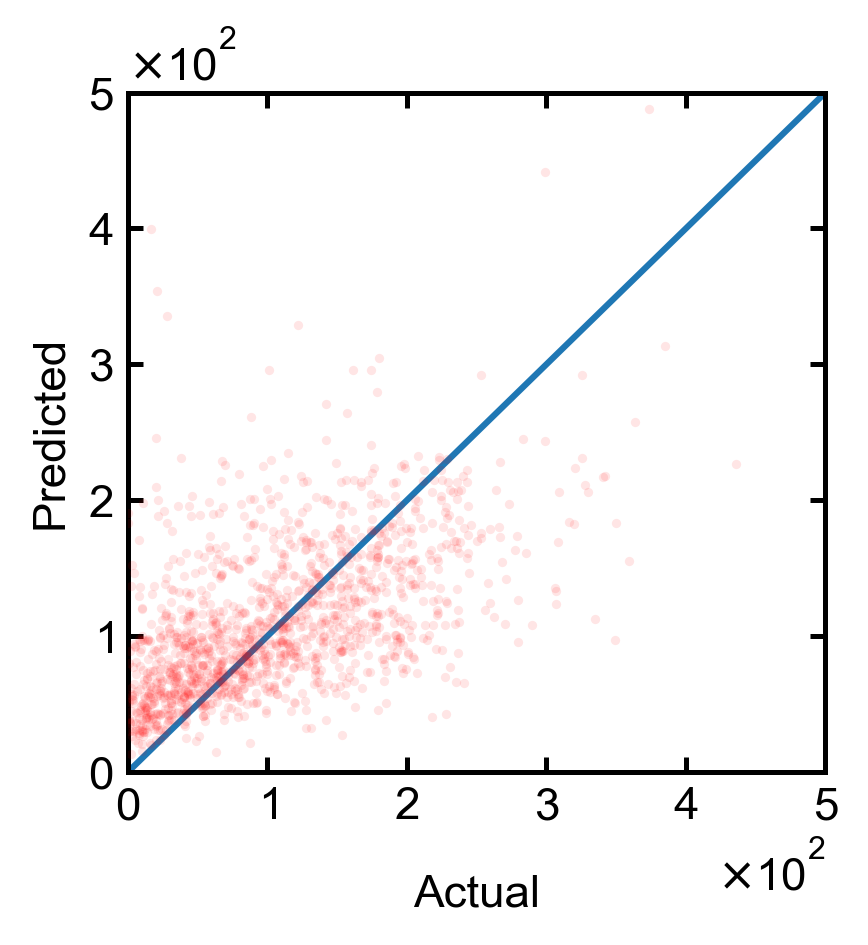

In [89]:
plt.rcParams['font.size'] = 11
plt.rcParams['font.family']= 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['text.usetex'] = False
#plt.rcParams['text.latex.unicode'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.grid']=True
plt.rcParams['grid.linestyle']='--'
plt.rcParams['grid.linewidth'] = 0.3
plt.rcParams["legend.markerscale"] = 2
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'

fig = plt.figure(figsize=(3*len(targetlist),3),dpi=300,facecolor='w',edgecolor='k')

for i, tg in enumerate(targetlist):
    ax = fig.add_subplot(1,len(targetlist),i+1)
    ax.ticklabel_format(style="sci", scilimits=(0,0), axis="x",useMathText=True)
    ax.ticklabel_format(style="sci", scilimits=(0,0), axis="y",useMathText=True)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')

    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.xaxis.set_label_coords(0.5, -0.15)
    
    ax.set_xlim(0,500)
    ax.set_ylim(0,500)
    
    ax.grid(zorder=0)
    
    pred = results[tg]["model"].predict(results[tg]["Xtestlist"])

    c = "red"
    ax.scatter(results[tg]["ytestlist"], pred,s=5,color=c,label=None,alpha = 0.1,lw=0,zorder=3)
    ax.plot([0,600],[0,600])
    #ax.scatter(results["ytestlist"][-1], results["ytestlist"][-1],s=1,color="red",label="Model using Starrydata",alpha = 1,lw=0,zorder=3)
        
#plt.tight_layout(pad=0.1, w_pad=1, h_pad=1.0)

In [90]:
for i, tg in enumerate(targetlist):
    print(tg)
    
    r2list = np.array(results[tg]["r2list"])
    raelist = np.array(results[tg]["raelist"])
    rselist = np.array(results[tg]["rselist"])
    maelist = np.array(results[tg]["maelist"])
    rmselist = np.array(results[tg]["rmselist"])
    display(pd.DataFrame([{"R2":r2list.mean(),"MAE":maelist.mean(),"RMSE":rmselist.mean(),"RAE":raelist.mean(),"RSE":rselist.mean()}]))

bulk modulus


,R2,MAE,RMSE,RAE,RSE
0,0.067643,51.238398,120.961367,0.793892,0.932357
